In [1]:
# !pip3 install chartify --user
# !pip install --upgrade pip --user

In [1]:
import numpy as np
import pandas as pd
import os 
import chartify
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns

Loading BokehJS ...

In [2]:
# chartify.options

In [3]:
# os.listdir('../KKCHURN')

In [3]:
df_member = pd.read_csv('members_v3.gzip',compression='gzip')
# df_member.info()
# df_member.describe()

In [4]:
df_churn_list = pd.read_csv('user_label_201703.gzip',compression='gzip')
# df_trans_1 = pd.read_csv('transactions.csv')
# df_trans_2 = pd.read_csv('transactions_v2.csv')

In [5]:
def dtype_compressor(df):
  #object 
  # when unique ratio > 0.5, catogory stands less memory than object
  converted_obj = pd.DataFrame()
  df_obj = df.select_dtypes(include=['object'])
  for col in df_obj.columns:
    converted_obj.loc[:,col] = df_obj.loc[:,col].astype('category')

  # numbers
  df_down_num = pd.DataFrame()
  df_num = df.select_dtypes(include=['number'])
  for col in df_num.columns:
    df_down_num.loc[:,col] = pd.to_numeric(df_num.loc[:,col],downcast='signed')

  # merge
  df = pd.concat([converted_obj,df_down_num],axis=1)
  
  del converted_obj, df_obj, df_down_num, df_num  
  
  return df

In [6]:
def fast_datetime(s):
    dates = {date:pd.to_datetime(date,format='%Y%m%d') for date in s.unique()}
    return s.map(dates)

In [7]:
data = pd.merge(df_churn_list,df_member,how='left',on=['msno'])


In [8]:
# data = dtype_compressor(data)
data['registration_init_time'] = fast_datetime(data.registration_init_time)
data.info()
data.isnull().sum() / len(data)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886500 entries, 0 to 886499
Data columns (total 7 columns):
msno                      886500 non-null object
is_churn                  886500 non-null int64
city                      777751 non-null float64
bd                        777751 non-null float64
gender                    316977 non-null object
registered_via            777751 non-null float64
registration_init_time    777751 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 54.1+ MB


msno                      0.000000
is_churn                  0.000000
city                      0.122672
bd                        0.122672
gender                    0.642440
registered_via            0.122672
registration_init_time    0.122672
dtype: float64

In [9]:
data.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
0,++4RuqBw0Ss6bQU4oMxaRlbBPoWzoEiIZaxPM04Y4+U=,0,1.0,0.0,NaN,7.0,2014-07-14
1,+/HS8LzrRGXolKbxRzDLqrmwuXqPOYixBIPXkyNcKNI=,0,NaN,NaN,NaN,NaN,NaT
2,+/g9O3USecrC8npzaFHXW/2XJ7fB80SineiUoCg7M6o=,0,NaN,NaN,NaN,NaN,NaT
3,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,0,15.0,31.0,male,9.0,2006-06-03
4,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,0,9.0,31.0,male,9.0,2004-03-30


In [10]:
data_valid = data.query('90 > bd > 0')
data_valid.shape

(313716, 7)

In [11]:
data_valid.head()

,msno,is_churn,city,bd,gender,registered_via,registration_init_time
3,+/namlXq+u3izRjHCFJV4MgqcXcLidZYszVsROOq/y4=,0,15.0,31.0,male,9.0,2006-06-03
4,+0/X9tkmyHyet9X80G6GTrDFHnJqvai8d1ZPhayT0os=,0,9.0,31.0,male,9.0,2004-03-30
5,+09YGn842g6h2EZUXe0VWeC4bBoCbDGfUboitc0vIHw=,0,15.0,29.0,male,9.0,2008-03-22
6,+0l+FDuhyjaZnu0APnrg5L9QqgaRw4RmdQMvqOtKDmU=,0,13.0,32.0,male,3.0,2015-03-16
8,+2Df04hr61UUJijMM2xR97gtoQWWDJpnJVKQ7VMYN9o=,0,6.0,31.0,female,9.0,2008-04-17


In [12]:
df_example = chartify.examples.example_data()
df_example.head()

,date,country,fruit,unit_price,quantity,total_price
0,2017-10-21,US,Banana,0.303711,4,1.214846
1,2017-05-30,JP,Banana,0.254109,4,1.016436
2,2017-05-21,CA,Banana,0.268635,4,1.074539
3,2017-09-18,BR,Grape,2.215277,2,4.430554
4,2017-12-08,US,Banana,0.308337,5,1.541687


# Chartify

## Blank charts

In [167]:
InteractiveShell.ast_node_interactivity ='last_expr'

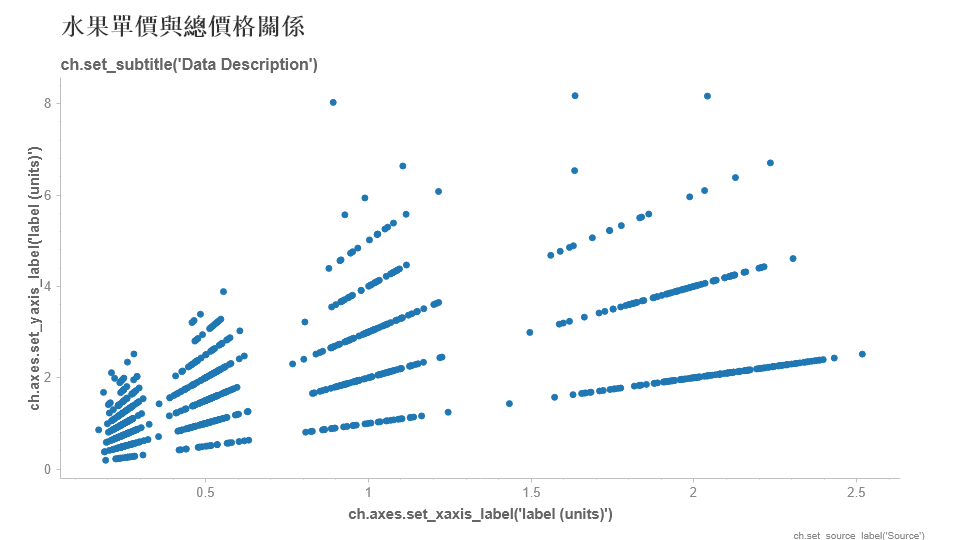

In [168]:
# set blank_labels = True or False 
ch = chartify.Chart(blank_labels=False)
ch.plot.scatter(data_frame=df_example,
               x_column='unit_price',
               y_column='total_price')
ch.set_title('水果單價與總價格關係');
# ch.set_subtitle('Chartify 內建數據');
# ch.set_source_label('Chartify');
# ch.axes.set_xaxis_label('單價');
# ch.axes.set_yaxis_label('總價格');

ch.show('png')

##  scatter  2 numeric with categorical(color)

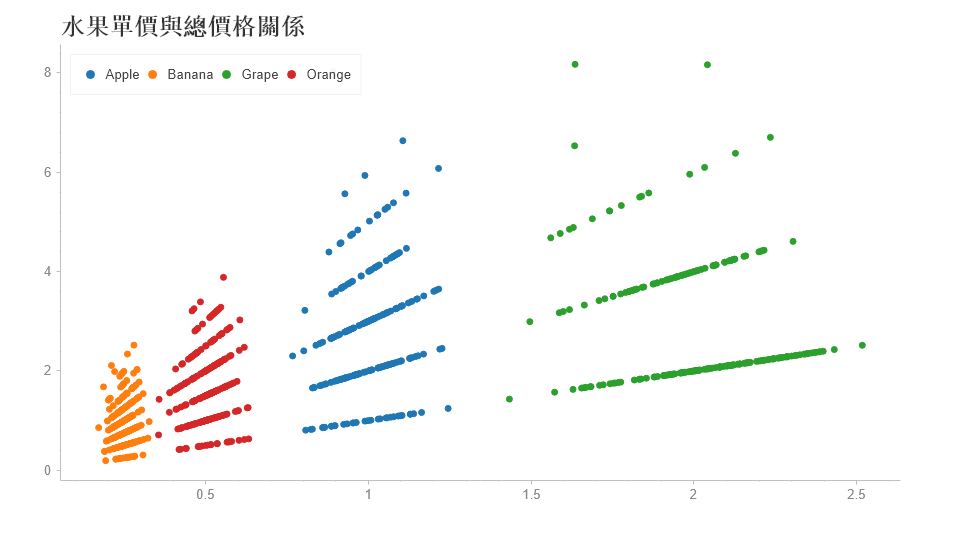

In [18]:
# with 3 dimension 2 numerical + one categorical
# set blank_labels = True or False 
ch = chartify.Chart(blank_labels=True)
ch.plot.scatter(data_frame=df_example,
               x_column='unit_price',
               y_column='total_price',
               color_column='fruit')
ch.set_title('水果單價與總價格關係');
# ch.set_subtitle('Chartify 內建數據');
# ch.set_source_label('Chartify');
# ch.axes.set_xaxis_label('單價');
# ch.axes.set_yaxis_label('總價格');

ch.show('png')

# BarPlot categorical vs numrical

In [19]:
import matplotlib.pyplot as plot

In [20]:
%matplotlib inline

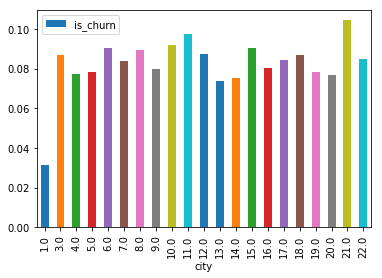

In [21]:
data.head()
city_churn = data[['city','is_churn']].groupby(by=['city'],as_index=False).mean()
# 每個城市的流失比例?
city_churn.plot(x='city',y='is_churn',kind='bar')
# with 95% ci ? 


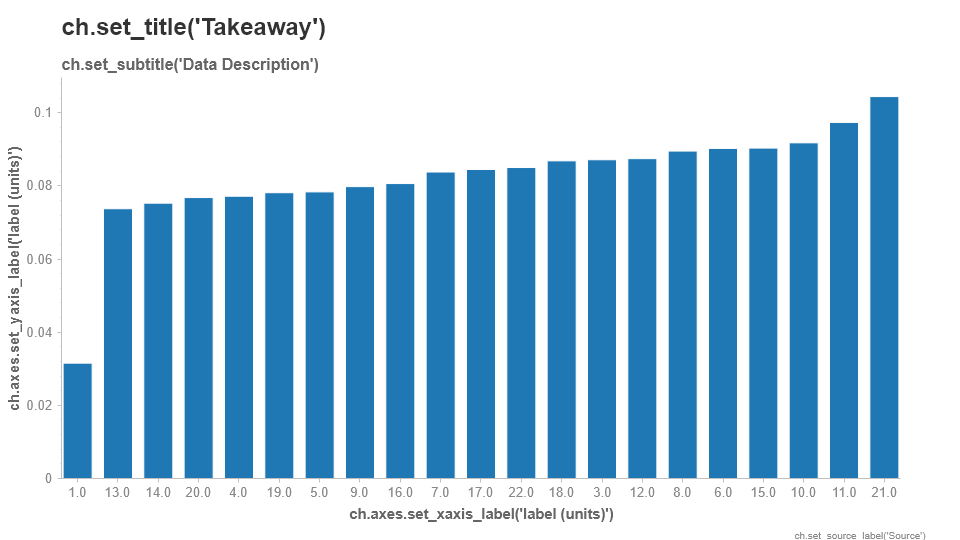

In [24]:
# in chartify
# automatically sort by value_counts
ch = chartify.Chart(
                   x_axis_type='categorical')
ch.plot.bar(data_frame=city_churn,
           categorical_columns='city',
           numeric_column='is_churn',
           categorical_order_ascending=True)
ch.show('png')

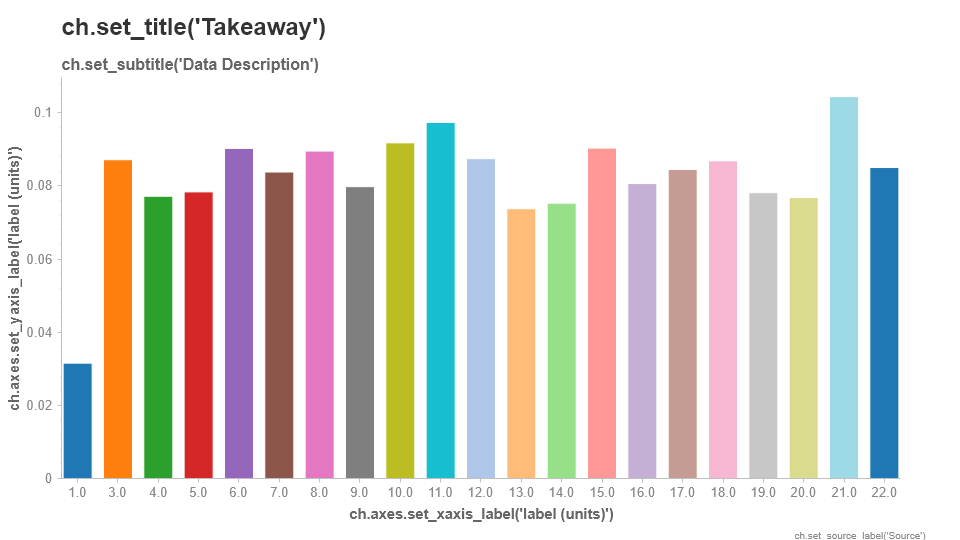

In [33]:
# sort by label
# pass categorical_order_by='labels'
# style if need
ch = chartify.Chart(
                   x_axis_type='categorical')
ch.plot.bar(data_frame=city_churn,
           categorical_columns='city',
           numeric_column='is_churn',
           categorical_order_by='labels',
           categorical_order_ascending=True,
           color_column='city')
ch.show('png')

In [163]:
chartify.Chart?

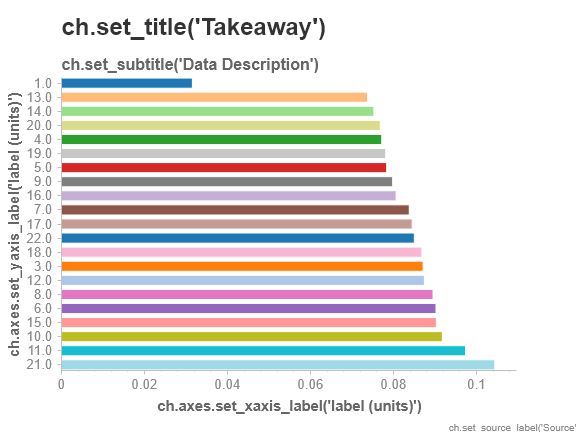

In [36]:
# barh
# pass y_axis
ch = chartify.Chart(y_axis_type='categorical',layout='slide_75%')
ch.plot.bar(data_frame=city_churn,
       categorical_columns='city',
       numeric_column='is_churn',
            color_column='city')
ch.show('png')

In [50]:
city_churn['churn_ratio'] = city_churn.is_churn*100
city_churn;

## show value and remove y_axis

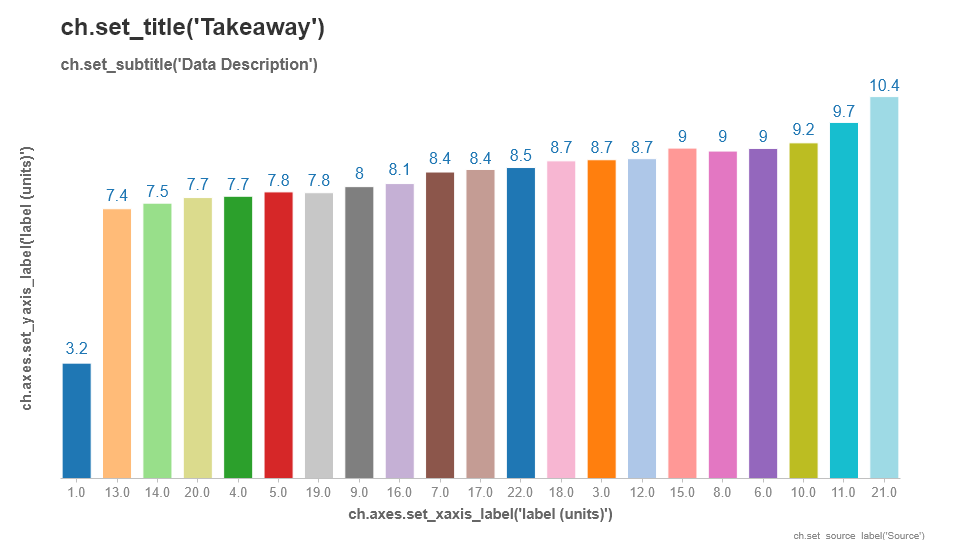

In [52]:
# bar without y_axis and show values
# give two charts
ch = chartify.Chart(x_axis_type='categorical')
ch.plot.bar(data_frame=city_churn,
           categorical_columns='city',
           numeric_column='churn_ratio',
           color_column='city',
           categorical_order_ascending=True)
# set style
ch.style.color_palette.reset_palette_order()
# text chart
ch.plot.text(data_frame=city_churn.round(1),
           categorical_columns='city',
           numeric_column='churn_ratio',
           text_column='churn_ratio',
           categorical_order_ascending=True)
# hidden y axis
ch.axes.hide_yaxis()
ch.show('png')

In [55]:
city_churn_ci = data.groupby('city')['is_churn'].agg([
    'mean','std','count'
]).assign(lower_ci = lambda x : x['mean'] - 1.96* x['std'] / x['count']**.5,
         upper_ci = lambda x : x['mean'] + 1.96* x['std'] / x['count']**.5).reset_index()
city_churn_ci.round(3).head()

,city,mean,std,count,lower_ci,upper_ci
0,1.0,0.032,0.175,439734,0.031,0.032
1,3.0,0.087,0.282,4338,0.079,0.096
2,4.0,0.077,0.267,40201,0.075,0.080
3,5.0,0.078,0.269,60471,0.076,0.080
4,6.0,0.090,0.287,20558,0.086,0.094


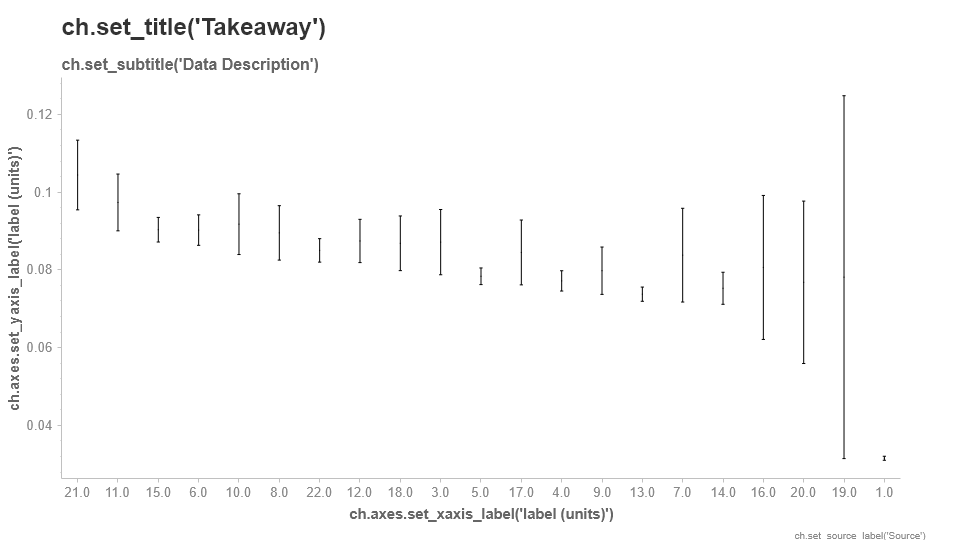

In [57]:
# with interval
ch = chartify.Chart(x_axis_type='categorical')
ch.plot.interval(data_frame=city_churn_ci,
                categorical_columns='city',
                lower_bound_column='lower_ci',
                upper_bound_column='upper_ci',
                middle_column='mean')
ch.show('png')

In [164]:
city_churn_ci.head()

,city,mean,std,count,lower_ci,upper_ci
0,1.0,0.031535,0.174759,439734,0.031018,0.032052
1,3.0,0.087137,0.282068,4338,0.078743,0.095531
2,4.0,0.077162,0.266852,40201,0.074554,0.079771
3,5.0,0.078352,0.268726,60471,0.076210,0.080493
4,6.0,0.090233,0.286522,20558,0.086316,0.094149


## with ci interval

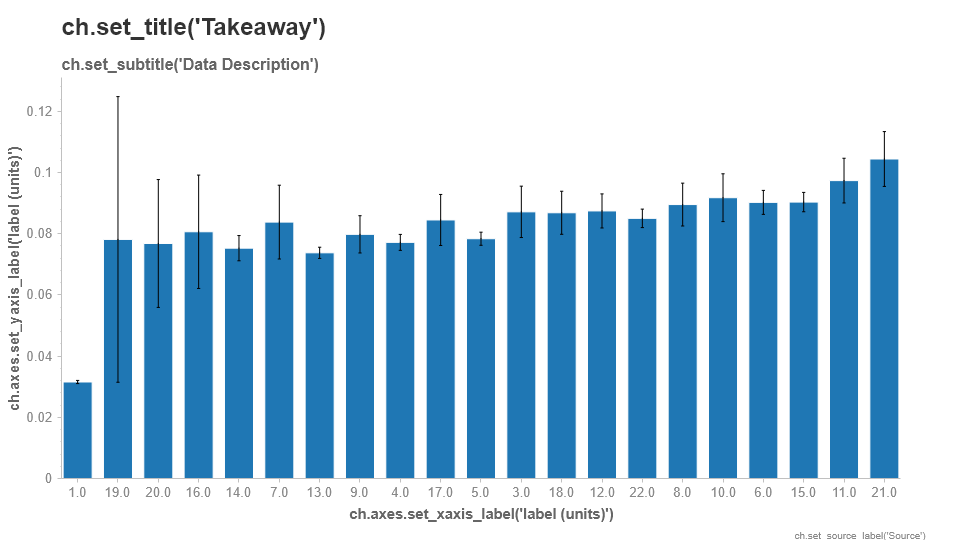

In [87]:
# combine
# with interval
ch = chartify.Chart(x_axis_type='categorical')
ch.plot.bar(data_frame=city_churn_ci,
           categorical_columns='city',
           numeric_column='mean',
           categorical_order_ascending=True)
ch.plot.interval(data_frame=city_churn_ci,
                categorical_columns='city',
                lower_bound_column='lower_ci',
                upper_bound_column='upper_ci',
                middle_column='mean',
                categorical_order_ascending=True)
ch.show('png')

In [64]:
# sns.barplot(x='city',y='is_churn',data=data_valid)

## Lolippop (many category)

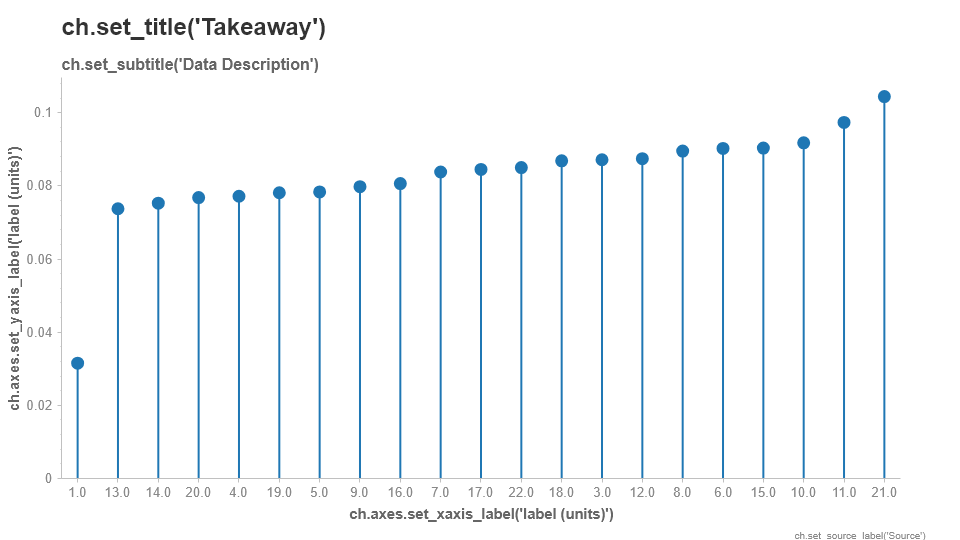

In [179]:
ch = chartify.Chart(x_axis_type='categorical')
ch.plot.lollipop(data_frame=city_churn_ci,
           categorical_columns='city',
           numeric_column='mean',
           categorical_order_ascending=True)
ch.show('png')

In [ ]:
# with interval plot

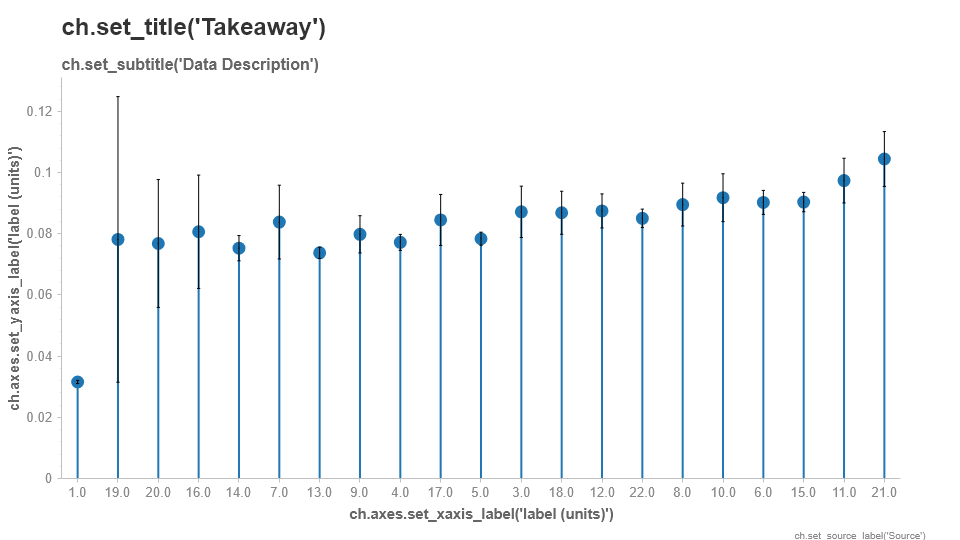

In [186]:
# combine
# with interval
ch = chartify.Chart(x_axis_type='categorical')
ch.plot.lollipop(data_frame=city_churn_ci.sort_values(by=['mean']),
           categorical_columns='city',
           numeric_column='mean',
           categorical_order_ascending=True
                )
ch.plot.interval(data_frame=city_churn_ci,
                categorical_columns='city',
                lower_bound_column='lower_ci',
                upper_bound_column='upper_ci',
                middle_column='mean',
                categorical_order_ascending=True
                )
ch.show('png')

# Group Bar categorical categorical with numerical

In [242]:
gender_reg_via_churn_stats = data_valid[['gender','registered_via','is_churn']]\
.groupby(by=['gender','registered_via']).agg(['mean','std','count']).is_churn\
.assign(
         lower_ci = lambda x : x['mean'] - 1.96* x['std'] / x['count']**.5,
         upper_ci = lambda x : x['mean'] + 1.96* x['std'] / x['count']**.5).reset_index()
display(gender_reg_via_churn_stats.round(3).head())
display(data_valid[['gender','registered_via','is_churn']]\
.groupby(by=['gender','registered_via']).agg(['mean','std','count']))

,gender,registered_via,mean,std,count,lower_ci,upper_ci
0,female,3.0,0.130,0.337,31222,0.127,0.134
1,female,4.0,0.171,0.377,10172,0.164,0.178
2,female,7.0,0.016,0.124,29686,0.014,0.017
3,female,9.0,0.077,0.266,72302,0.075,0.079
4,female,13.0,0.009,0.097,106,-0.009,0.028


is_churn                 
                           mean       std  count
gender registered_via                           
female 3.0             0.130293  0.336631  31222
       4.0             0.171058  0.376578  10172
       7.0             0.015698  0.124305  29686
       9.0             0.076706  0.266126  72302
       13.0            0.009434  0.097129    106
male   3.0             0.140024  0.347017  36758
       4.0             0.191501  0.393498  12684
       7.0             0.016742  0.128305  35778
       9.0             0.076790  0.266259  77354
       13.0            0.079137  0.270928    139

In [239]:
# combine
# with interval
ch = chartify.Chart(x_axis_type='categorical')
ch.plot.bar(data_frame=gender_reg_via_churn_stats,
           categorical_columns=['registered_via','gender'],
           numeric_column='mean',
           color_column='gender',
           categorical_order_ascending=True
                )
ch.plot.interval(data_frame=gender_reg_via_churn_stats,
                categorical_columns=['registered_via','gender'],
                lower_bound_column='lower_ci',
                upper_bound_column='upper_ci',
                middle_column='mean',
                categorical_order_ascending=True
                )
ch.show()

## with exact value

In [245]:
# bar without y_axis and show values
# give two charts
# combine
# with interval
ch = chartify.Chart(x_axis_type='categorical')
ch.plot.bar(data_frame=gender_reg_via_churn_stats,
           categorical_columns=['registered_via','gender'],
           numeric_column='mean',
           color_column='gender',
           categorical_order_ascending=True
                )
'''ch.plot.interval(data_frame=gender_reg_via_churn_stats,
                categorical_columns=['registered_via','gender'],
                lower_bound_column='lower_ci',
                upper_bound_column='upper_ci',
                middle_column='mean',
                categorical_order_ascending=True
                )'''
ch.plot.text(data_frame=gender_reg_via_churn_stats.round(3),
           categorical_columns=['registered_via','gender'],
           numeric_column='mean',
           text_column='mean',
           categorical_order_ascending=True)
# hidden y axis
ch.axes.hide_yaxis()
ch.show()

# Style

In [66]:
chartify.color_palettes

Color Palettes: 
'Category20'
'Category10'
'Colorblind'
'Dark2'
'Pastel1'
'RdBu'
'RdGy'
'Greys'
'Greens'
'Blues'
'Reds'
'Oranges'
'All colors'

## Accent --> Highlight specific category

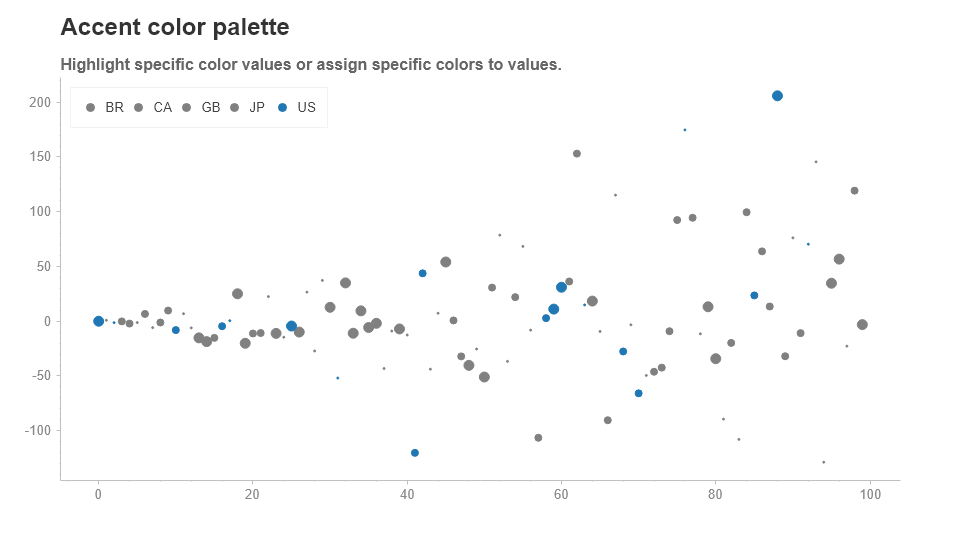

In [120]:
data = pd.DataFrame({'x': list(range(100))})
data['y'] = data['x'] * np.random.normal(size=100)
data['z'] = np.random.choice([2, 7, 10], size=100)
data['country'] = np.random.choice(
        ['US', 'GB', 'CA', 'JP', 'BR'], size=100)

# Plot the data
ch = chartify.Chart(blank_labels=True)
ch.style.set_color_palette('accent', accent_values=['US'])
ch.plot.scatter(
        data_frame=data,
        x_column='x',
        y_column='y',
        size_column='z',
        color_column='country')
ch.set_title("Accent color palette")
ch.set_subtitle(
        "Highlight specific color values or assign specific colors to values.")
ch.show('png')

## Sequential

In [178]:
city_churn_ci['churn_rank'] = city_churn_ci['mean'].rank()
city_churn_ci.head()

,city,mean,std,count,lower_ci,upper_ci,churn_rank
0,1.0,0.031535,0.174759,439734,0.031018,0.032052,1.0
1,3.0,0.087137,0.282068,4338,0.078743,0.095531,14.0
2,4.0,0.077162,0.266852,40201,0.074554,0.079771,5.0
3,5.0,0.078352,0.268726,60471,0.076210,0.080493,7.0
4,6.0,0.090233,0.286522,20558,0.086316,0.094149,17.0


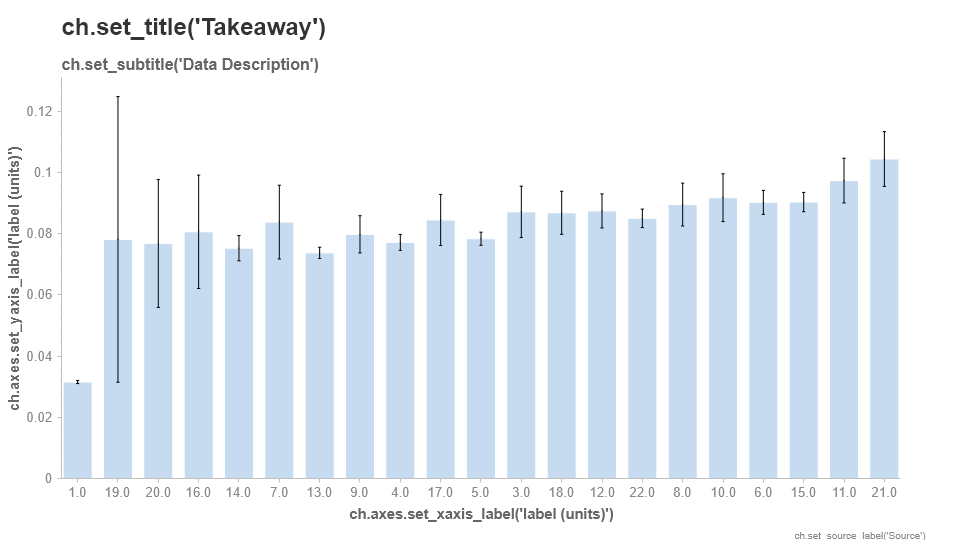

In [177]:
# with sequential color palette

ch = chartify.Chart(x_axis_type='categorical')
ch.style.set_color_palette(palette_type='sequential')
# plot
ch.plot.bar(data_frame=city_churn_ci,
           categorical_columns='city',
           numeric_column='mean')
ch.plot.interval(data_frame=city_churn_ci,
                categorical_columns='city',
                lower_bound_column='lower_ci',
                upper_bound_column='upper_ci',
                middle_column='mean',
                categorical_order_ascending=True)
ch.show('png')

# Callout

## lines

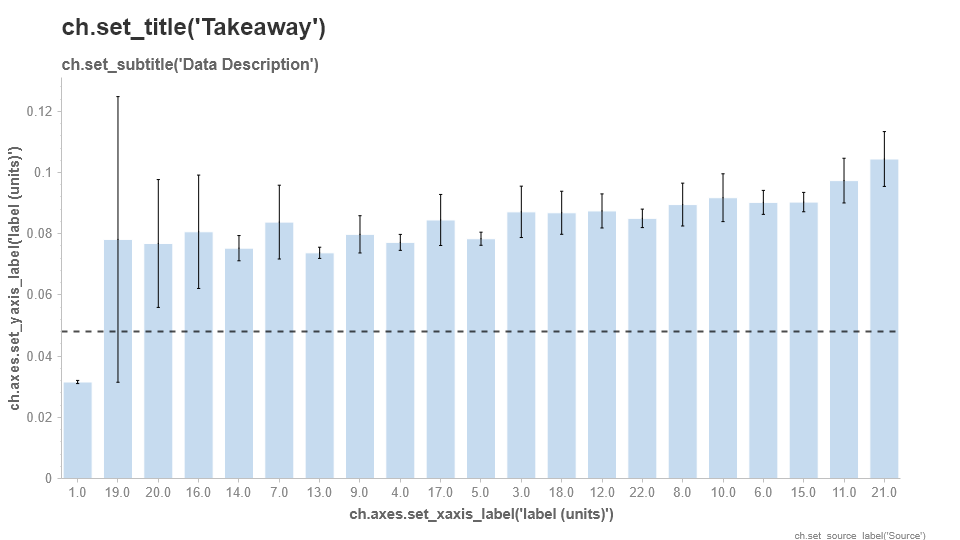

In [102]:
ch = chartify.Chart(x_axis_type='categorical')
ch.style.set_color_palette('sequential',palette='Blues')
# plot
ch.plot.bar(data_frame=city_churn_ci,
           categorical_columns='city',
           numeric_column='mean',
           categorical_order_ascending=True,
           )
ch.plot.interval(data_frame=city_churn_ci,
                categorical_columns='city',
                lower_bound_column='lower_ci',
                upper_bound_column='upper_ci',
                middle_column='mean',
                categorical_order_ascending=True)
ch.callout.line(0.048,line_dash='dashed',line_alpha=.7)
ch.show('png')

## Box (shade) callout

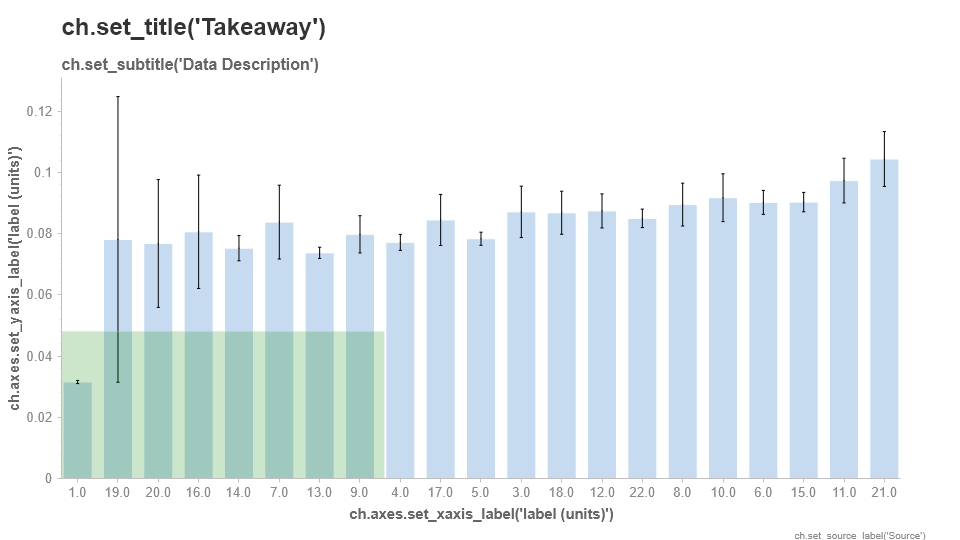

In [108]:
ch = chartify.Chart(x_axis_type='categorical')
ch.style.set_color_palette('sequential',palette='Blues')
# plot
ch.plot.bar(data_frame=city_churn_ci,
           categorical_columns='city',
           numeric_column='mean',
           categorical_order_ascending=True,
           )
ch.plot.interval(data_frame=city_churn_ci,
                categorical_columns='city',
                lower_bound_column='lower_ci',
                upper_bound_column='upper_ci',
                middle_column='mean',
                categorical_order_ascending=True)
ch.callout.box(top=0.048,right=10,color='green')
ch.show('png')

## text callout

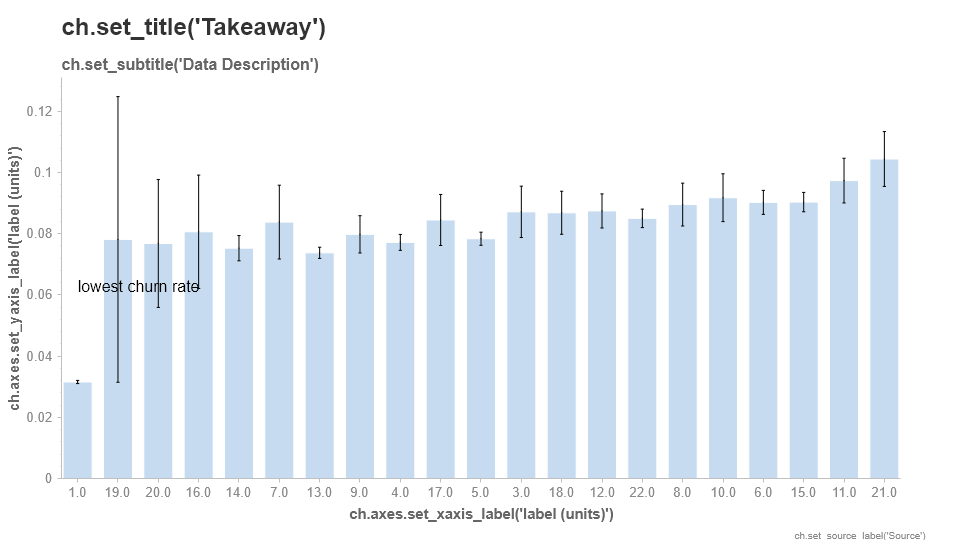

In [111]:
ch = chartify.Chart(x_axis_type='categorical')
ch.style.set_color_palette('sequential',palette='Blues')
# plot
ch.plot.bar(data_frame=city_churn_ci,
           categorical_columns='city',
           numeric_column='mean',
           categorical_order_ascending=True,
           )
ch.plot.interval(data_frame=city_churn_ci,
                categorical_columns='city',
                lower_bound_column='lower_ci',
                upper_bound_column='upper_ci',
                middle_column='mean',
                categorical_order_ascending=True)
ch.callout.text('lowest churn rate',0.5,0.06)
ch.show('png')

# category category with numeric color and values

## Heatmap
### churn_rate by_city and age_band

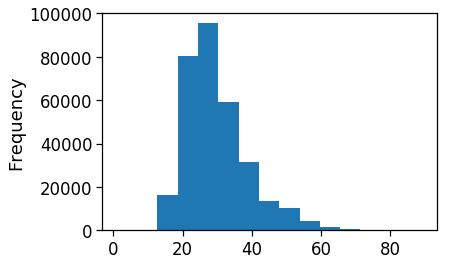

In [128]:
data_valid['bd'].plot(kind='hist',bins=15)
data_valid['age_band'] = data_valid['bd'].apply(lambda x : '0-26' if 26 > x >= 0 else '26-36' if 36 > x >= 26 else '36-46'
                                               if 46 > x >= 36 else '46-56' if 56 > x >= 46 else '56-99')

In [135]:
# pivoted data is INVALID
pivoted = pd.pivot_table(data=data_valid,values='is_churn',index='city',columns='age_band').round(3)


In [142]:
display(pivoted.head())
# put city into a column
display(pivoted.reset_index().head())

age_band,0-26,26-36,36-46,46-56,56-99
city,,,,,
1.0,0.190,0.147,0.146,0.152,0.155
3.0,0.134,0.063,0.036,0.015,0.048
4.0,0.116,0.059,0.054,0.037,0.035
5.0,0.119,0.066,0.062,0.043,0.046
6.0,0.129,0.071,0.066,0.059,0.077


age_band,city,0-26,26-36,36-46,46-56,56-99
0,1.0,0.190,0.147,0.146,0.152,0.155
1,3.0,0.134,0.063,0.036,0.015,0.048
2,4.0,0.116,0.059,0.054,0.037,0.035
3,5.0,0.119,0.066,0.062,0.043,0.046
4,6.0,0.129,0.071,0.066,0.059,0.077


In [155]:
# Melting pivot data is VALID
value_columns = pivoted.columns
value_columns
# wide to long
melted = pd.melt(pivoted.reset_index(),
                 id_vars='city',
                value_vars=value_columns)
melted = melted.rename(columns={'value':'churn_rate'})

In [156]:
# check the answer
display(melted[melted.city == 1.0])
display(pivoted.head())

,city,age_band,churn_rate
0,1.0,0-26,0.190
21,1.0,26-36,0.147
42,1.0,36-46,0.146
63,1.0,46-56,0.152
84,1.0,56-99,0.155


age_band,0-26,26-36,36-46,46-56,56-99
city,,,,,
1.0,0.190,0.147,0.146,0.152,0.155
3.0,0.134,0.063,0.036,0.015,0.048
4.0,0.116,0.059,0.054,0.037,0.035
5.0,0.119,0.066,0.062,0.043,0.046
6.0,0.129,0.071,0.066,0.059,0.077


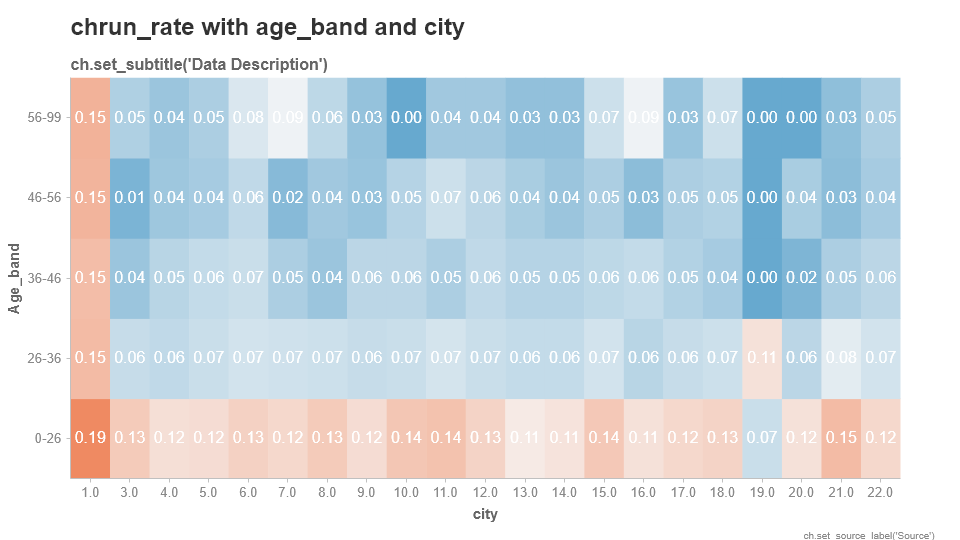

In [159]:
ch = chartify.Chart(x_axis_type='categorical',
                   y_axis_type='categorical')
ch.plot.heatmap(data_frame= melted,
               x_column='city',
               y_column='age_band',
               color_column='churn_rate',
               text_column='churn_rate',
               text_color='white')
ch.set_title('chrun_rate with age_band and city')
ch.axes.set_yaxis_label('Age_band')
ch.axes.set_xaxis_label('city')
ch.show('png')